# Project 4: Clustering
* K-means
* Hierarchical
* DBSCAN

In [1]:
from sklearn import cluster
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
import collections
import datetime
import time

## Heatmap by all attributes

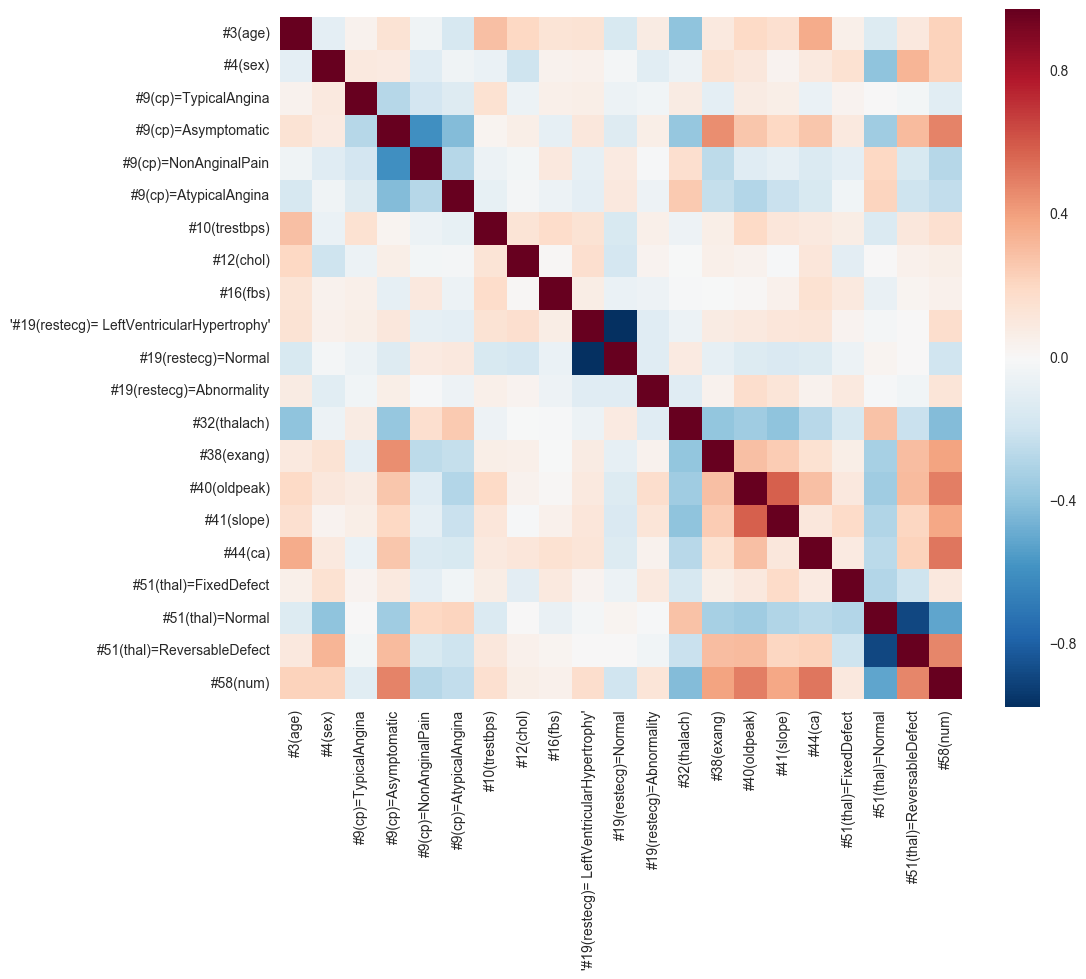

In [2]:
sns.set(style="white")

# Load the datset of correlations between cortical brain networks
df = pd.read_csv('processed.cleveland_ini_pre.csv')
corrmat = df.corr()
# print(corrmat)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap using seaborn
# sns.color_palette("RdGy", 10)
# sns.palplot(sns.color_palette("RdGy", 10))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## K means: clusters number choice

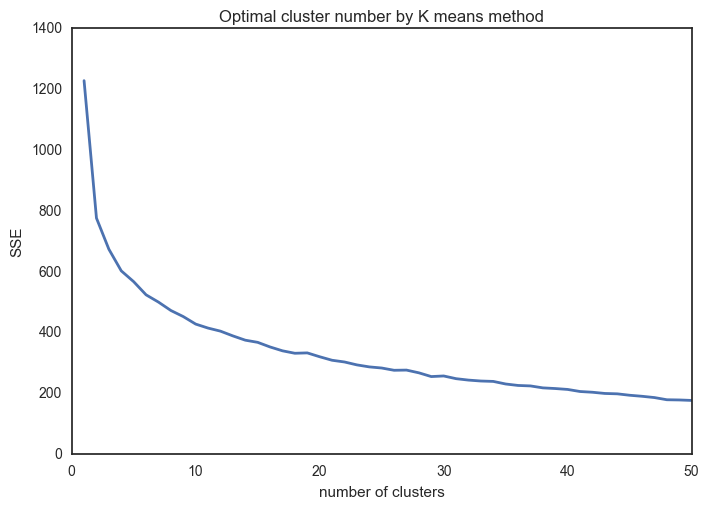

In [3]:
# K means

df = pd.read_csv('processed.cleveland_ini_pre.csv')
# df = pd.get_dummies(df)
# df = preprocessing.normalize(df, norm='l2')

# Data_1 = df([])
Kmean_score = np.zeros((50,1))
for i in range(50):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

# plt.figure(figsize=(10,5))
plt.plot(np.arange(1,51), Kmean_score, lw=2)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Optimal cluster number by K means method')
plt.show()

### Guiding Question 1 
** K means**

* cluster number

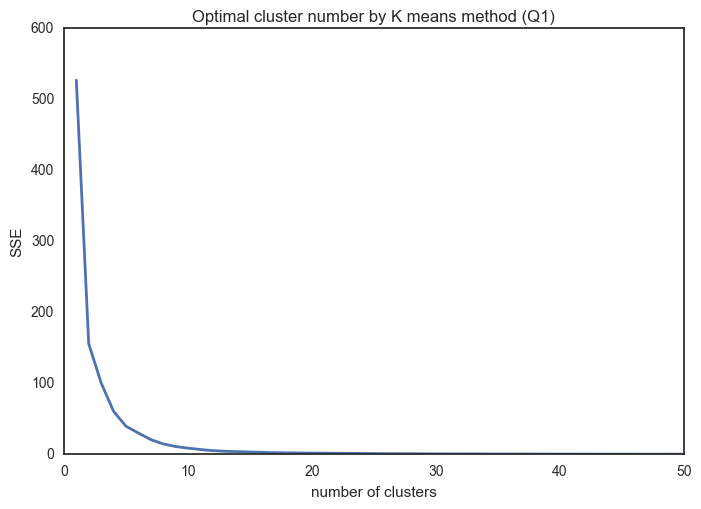

In [4]:

df_1 = pd.DataFrame(df, columns=['#3(age)','#4(sex)','#58(num)'])

Kmean_score = np.zeros((50,1))
for i in range(50):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df_1)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

# plt.figure(figsize=(10,5))
plt.plot(np.arange(1,51), Kmean_score, lw=2)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Optimal cluster number by K means method (Q1)',fontsize=12)
plt.show()

In [5]:
# guiding question 1 
## K-means, 10 clusters
start_time = time.time()
k_1 = cluster.KMeans(n_clusters=10, random_state=0).fit(df_1)
print(k_1.labels_)
print()
print(k_1.cluster_centers_)
print()
print(k_1.inertia_)

[0 4 3 0 2 0 8 9 4 3 0 9 4 0 0 0 3 0 2 0 0 9 3 1 5 2 9 9 0 1 9 4 3 0 0 0 1
 3 1 0 8 0 9 0 6 5 0 5 9 0 2 0 4 0 3 3 3 3 0 0 7 2 3 9 4 4 3 0 4 3 9 1 3 3
 3 9 3 2 0 1 0 2 0 1 0 0 0 2 2 0 8 0 2 9 3 4 8 0 0 0 0 9 9 1 0 4 3 4 1 6 3
 0 7 7 0 0 2 1 4 1 8 0 1 3 2 8 1 0 9 0 0 0 0 2 9 5 1 3 0 0 3 0 3 0 3 5 0 0
 9 0 2 9 5 1 3 3 3 4 0 0 5 9 9 0 0 9 3 2 1 0 6 9 5 3 0 3 0 0 1 7 0 0 6 9 0
 4 3 4 0 1 7 9 1 0 2 2 3 2 9 0 9 0 1 1 1 0 6 2 5 0 8 3 0 2 2 9 0 2 9 2 1 6
 2 0 9 1 4 2 7 3 9 9 1 4 3 2 0 0 2 2 4 9 4 4 3 1 0 0 3 0 2 0 2 9 9 0 3 2 8
 9 0 5 4 4 3 0 3 0 4 9 3 0 9 2 3 9 4 0 8 0 4 5 7 0 0 3 9 4 4 6 0 1 6 3 4 1
 6]

[[  4.60440045e-01   1.00000000e+00   1.22124533e-15]
 [  5.42410750e-01   1.00000000e+00   3.00000000e+00]
 [  3.35286437e-01  -2.22044605e-16   6.66133815e-16]
 [  5.34722244e-01   1.00000000e+00   1.00000000e+00]
 [  6.23511857e-01   1.00000000e+00   2.00000000e+00]
 [  6.23106182e-01   1.00000000e+00   4.00000000e+00]
 [  6.52777667e-01   1.11022302e-16   1.00000000e+00]
 [  5.47619143e-0

In [6]:

cluster_percentage = [0]*10
for i in range(10):
    print(collections.Counter(k_1.labels_)[i]*100/297)
# cluster_percentage
# plt.bar(cluster_percentage,height=np.arange(0,1,0.1))
# plt.show()

29.966329966329965
9.427609427609427
10.774410774410775
15.151515151515152
9.427609427609427
3.7037037037037037
3.0303030303030303
2.356902356902357
3.0303030303030303
13.131313131313131


* Similarity matrix

[0 4 3 0 2 0 8 9 4 3 0 9 4 0 0 0 3 0 2 0 0 9 3 1 5 2 9 9 0 1 9 4 3 0 0 0 1
 3 1 0 8 0 9 0 6 5 0 5 9 0 2 0 4 0 3 3 3 3 0 0 7 2 3 9 4 4 3 0 4 3 9 1 3 3
 3 9 3 2 0 1 0 2 0 1 0 0 0 2 2 0 8 0 2 9 3 4 8 0 0 0 0 9 9 1 0 4 3 4 1 6 3
 0 7 7 0 0 2 1 4 1 8 0 1 3 2 8 1 0 9 0 0 0 0 2 9 5 1 3 0 0 3 0 3 0 3 5 0 0
 9 0 2 9 5 1 3 3 3 4 0 0 5 9 9 0 0 9 3 2 1 0 6 9 5 3 0 3 0 0 1 7 0 0 6 9 0
 4 3 4 0 1 7 9 1 0 2 2 3 2 9 0 9 0 1 1 1 0 6 2 5 0 8 3 0 2 2 9 0 2 9 2 1 6
 2 0 9 1 4 2 7 3 9 9 1 4 3 2 0 0 2 2 4 9 4 4 3 1 0 0 3 0 2 0 2 9 9 0 3 2 8
 9 0 5 4 4 3 0 3 0 4 9 3 0 9 2 3 9 4 0 8 0 4 5 7 0 0 3 9 4 4 6 0 1 6 3 4 1
 6]


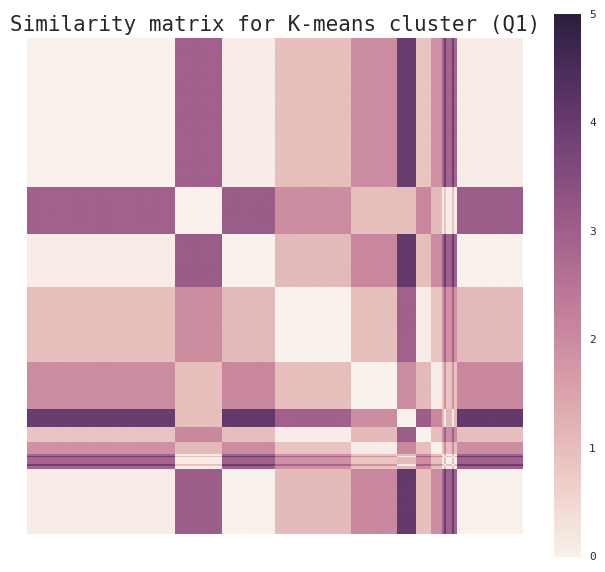

In [7]:
pca = PCA(n_components=1)
df_1_pca = np.ravel(pca.fit_transform(df_1))
DDD = [df_1_pca.T,k_1.labels_]
df_1_db = pd.DataFrame(DDD)
df_1_db = np.array(df_1_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_1_similar = pairwise_distances(df_1_db, metric='euclidean')
print(k_1.labels_)
load_time_k_1 = time.time() - start_time

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8,7))
cmap = sns.diverging_palette(220, 8, as_cmap=True)
sns.heatmap(df_1_similar, vmax=5, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for K-means cluster (Q1)',fontsize=15)
# plt.imshow(df_1_similar, cmap='BrBG', interpolation='nearest')
plt.show()


**Hierarchy cluster**

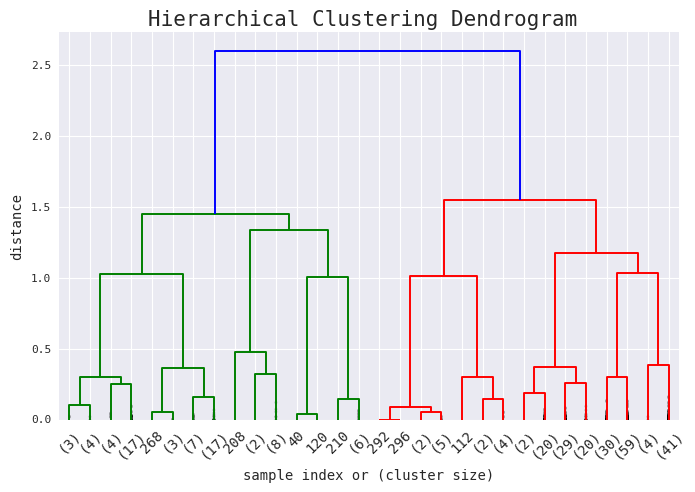

In [8]:
from scipy.cluster import hierarchy
from scipy.spatial import distance
start_time = time.time()
fig = plt.figure(figsize=(8,5))
Y = distance.pdist(df_1)
Z = hierarchy.linkage(Y, method = "average", metric = "euclidean")
T = hierarchy.fcluster(Z, 10, criterion = "distance",depth=10)
plt.title('Hierarchical Clustering Dendrogram ',fontsize=15)
plt.xlabel('sample index or (cluster size)',fontsize=10)
plt.ylabel('distance',fontsize=10)
hierarchy.dendrogram(Z,4,truncate_mode='level',orientation='top',show_contracted=True)
plt.show()
load_time_h_1 = time.time() - start_time


**DBSCAN**

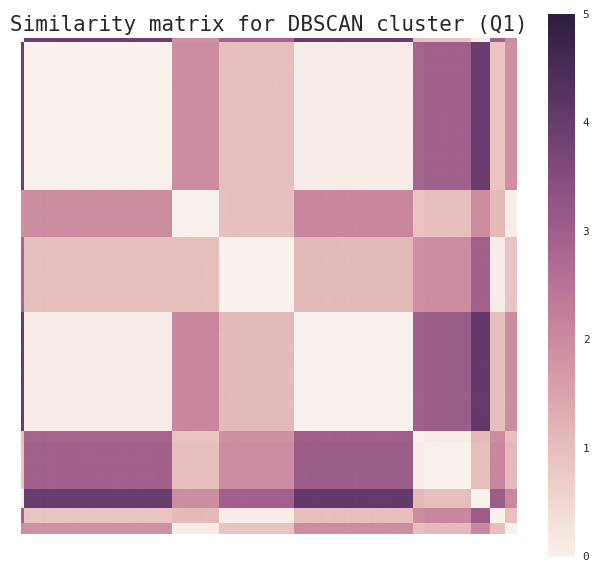

In [39]:
start_time = time.time()
DBSCAN = cluster.DBSCAN(metric='euclidean', algorithm='auto', leaf_size=5, p=None).fit(df_1)
# print(DBSCAN.labels_) 
pca = PCA(n_components=1)
df_1_pca = np.ravel(pca.fit_transform(df_1))
DDD = [df_1_pca.T,DBSCAN.labels_]
df_1_db = pd.DataFrame(DDD)
df_1_db = np.array(df_1_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_1_similar = pairwise_distances(df_1_db, metric='euclidean')
df_1_similar.shape
load_time_d_1 = time.time() - start_time

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_1_similar, vmax=5, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for DBSCAN cluster (Q1)',fontsize=15)
plt.show()



In [42]:
print(DBSCAN.get_params())
cluster_percentage = [0]*15
for i in range(15):
    print(collections.Counter(DBSCAN.labels_)[i-1]*100/297)

{'leaf_size': 5, 'random_state': None, 'metric': 'euclidean', 'p': None, 'eps': 0.5, 'min_samples': 5, 'algorithm': 'auto'}
0.6734006734006734
29.966329966329965
9.427609427609427
15.151515151515152
23.905723905723907
2.356902356902357
9.427609427609427
3.7037037037037037
3.0303030303030303
2.356902356902357
0.0
0.0
0.0
0.0
0.0


In [10]:
print("It took %.8s seconds to form K means cluster for Q1" % (load_time_k_1))
print("It took %.8s seconds to form Hierarchical cluster for Q1" % (load_time_h_1))
print("It took %.8s seconds to form DBSCAN cluster for Q1" % (load_time_d_1))

It took 0.206020 seconds to form K means cluster for Q1
It took 0.427407 seconds to form Hierarchical cluster for Q1
It took 0.023002 seconds to form DBSCAN cluster for Q1


### Guiding Question 2

**Kmeans**

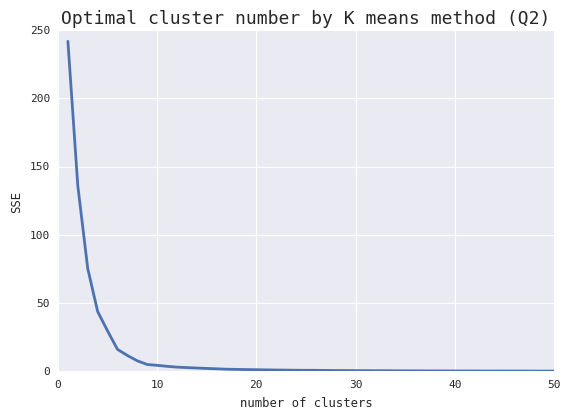

[7 0 0 1 2 2 8 8 8 4 8 2 5 2 5 1 2 8 1 2 3 7 2 1 0 1 1 3 8 0 3 4 1 8 1 8 0
 0 0 5 0 3 2 5 8 1 1 0 5 5 2 8 8 2 8 0 1 8 1 3 8 1 0 5 0 8 1 1 8 1 1 4 0 8
 8 1 8 1 2 0 8 8 1 5 2 1 1 8 1 8 8 1 1 1 8 8 8 2 8 8 3 8 5 1 2 8 1 8 8 8 4
 3 4 1 9 5 8 4 0 4 8 1 0 7 2 4 0 2 8 1 1 2 8 1 2 0 9 0 5 2 3 6 1 1 1 4 1 2
 1 7 0 1 8 0 0 8 8 8 1 6 8 1 0 5 8 6 8 9 1 0 8 8 0 0 4 0 1 5 8 8 3 3 8 2 5
 9 2 1 1 0 4 1 0 7 8 2 3 8 8 5 1 8 8 0 0 2 8 1 3 1 4 8 3 2 8 0 8 1 1 1 0 8
 2 8 1 0 0 1 0 1 9 1 0 4 8 2 2 2 2 8 3 5 0 8 0 8 6 0 0 0 1 8 1 8 1 9 9 1 6
 3 1 0 0 5 8 1 8 8 0 0 3 3 1 1 2 0 8 1 0 2 8 8 4 2 2 1 2 8 8 0 2 4 0 3 4 0
 2]

[[  0.00000000e+00   1.00000000e+00  -3.33066907e-16  -5.55111512e-17
    1.11022302e-16   3.56683196e-01]
 [ -9.71445147e-17   3.88578059e-16   1.00000000e+00   1.11022302e-16
    0.00000000e+00   6.46426000e-01]
 [  0.00000000e+00   2.22044605e-16  -1.66533454e-16   1.00000000e+00
    2.77555756e-17   7.55312486e-01]
 [  1.00000000e+00  -5.55111512e-17   0.00000000e+00   5.55111512e-17
   -

In [11]:
df_2 = pd.DataFrame(df, columns=['#9(cp)=TypicalAngina','#9(cp)=Asymptomatic','#9(cp)=NonAnginalPain','#9(cp)=AtypicalAngina',
                                 '#16(fbs)','#32(thalach)'])

Kmean_score = np.zeros((50,1))
for i in range(50):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df_2)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

# plt.figure(figsize=(10,5))
plt.plot(np.arange(1,51), Kmean_score, lw=2)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Optimal cluster number by K means method (Q2)',fontsize=13)
plt.show()

start_time = time.time()
k_2 = cluster.KMeans(n_clusters=10, random_state=0).fit(df_2)
print(k_2.labels_)
print()
print(k_2.cluster_centers_)
print()
print(k_2.inertia_)
load_time_k_2 = time.time() - start_time

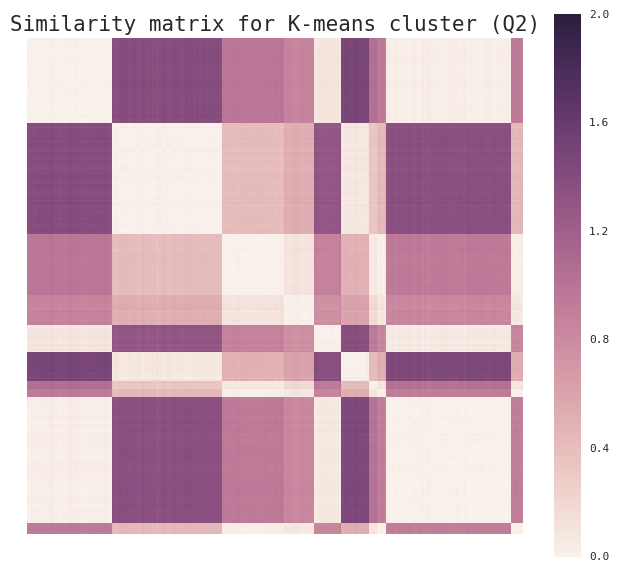

In [12]:

pca = PCA(n_components=1)
df_2_pca = np.ravel(pca.fit_transform(df_2))
DDD = [df_2_pca.T,k_2.labels_]
df_2_db = pd.DataFrame(DDD)
df_2_db = np.array(df_2_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_2_similar = pairwise_distances(df_2_db, metric='euclidean')
df_2_similar.shape

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_2_similar, vmax=2, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for K-means cluster (Q2)',fontsize=15)
plt.show()

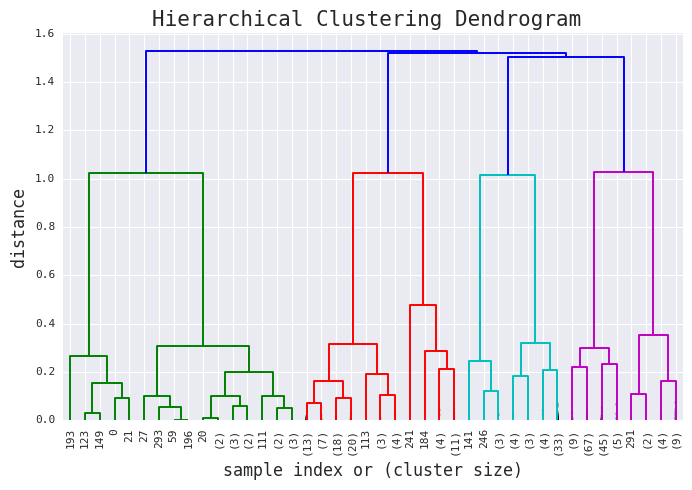

In [13]:
start_time = time.time()
fig = plt.figure(figsize=(8,5))
Y = distance.pdist(df_2)
Z = hierarchy.linkage(Y, method = "average", metric = "euclidean")
T = hierarchy.fcluster(Z, 10, criterion = "distance",depth=5)
plt.title('Hierarchical Clustering Dendrogram ',fontsize=15)
plt.xlabel('sample index or (cluster size)',fontsize=12)
plt.ylabel('distance',fontsize=12)
hierarchy.dendrogram(Z,5,truncate_mode='level',orientation='top',show_contracted=True)
plt.show()
load_time_h_2 = time.time() - start_time

[0 1 1 2 3 3 1 1 1 4 1 3 5 3 5 2 3 1 2 3 6 0 3 2 1 2 2 6 1 1 6 4 2 1 2 1 1
 1 1 5 1 6 3 5 1 2 2 1 5 5 3 1 1 3 1 1 2 1 2 6 1 2 1 5 1 1 2 2 1 2 2 4 1 1
 1 2 1 2 3 1 1 1 2 5 3 2 2 1 2 1 1 2 2 2 1 1 1 3 1 1 6 1 5 2 3 1 2 1 1 1 4
 6 4 2 3 5 1 4 1 4 1 2 1 0 3 4 1 3 1 2 2 3 1 2 3 1 3 1 5 3 6 7 2 2 2 4 2 3
 2 0 1 2 1 1 1 1 1 1 2 7 1 2 1 5 1 7 1 3 2 1 1 1 1 1 4 1 2 5 1 1 6 6 1 3 5
 3 3 2 2 1 4 2 1 0 1 3 6 1 1 5 2 1 1 1 1 3 1 2 6 2 4 1 6 3 1 1 1 2 2 2 1 1
 3 1 2 1 1 2 1 2 3 2 1 4 1 3 3 3 3 1 6 5 1 1 1 1 7 1 1 1 2 1 2 1 2 3 3 2 7
 6 2 1 1 5 1 2 1 1 1 1 6 6 2 2 3 1 1 2 1 3 1 1 4 3 3 2 3 1 1 1 3 4 1 6 4 1
 3]


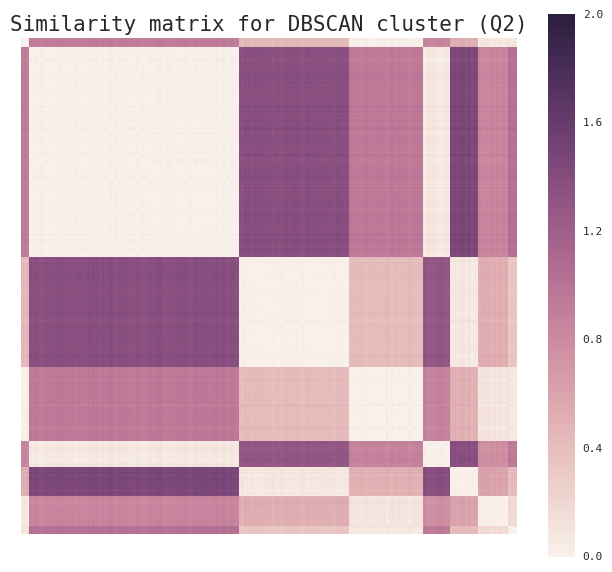

In [44]:
start_time = time.time()
DBSCAN = cluster.DBSCAN(metric='euclidean', algorithm='auto', leaf_size=4, p=None).fit(df_2)
print(DBSCAN.labels_) 


pca = PCA(n_components=1)
df_2_pca = np.ravel(pca.fit_transform(df_2))
DDD = [df_2_pca.T,DBSCAN.labels_]
df_2_db = pd.DataFrame(DDD)
df_2_db = np.array(df_2_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
# print(df_2_db)
df_2_similar = pairwise_distances(df_2_db, metric='euclidean')
# print(df_2_similar)
load_time_d_2 = time.time() - start_time

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_2_similar, vmax=2, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for DBSCAN cluster (Q2)',fontsize=15)
plt.show()


In [45]:
print(DBSCAN.get_params())
cluster_percentage = [0]*15
for i in range(15):
    print(collections.Counter(DBSCAN.labels_)[i-2]*100/297)

{'leaf_size': 4, 'random_state': None, 'metric': 'euclidean', 'p': None, 'eps': 0.5, 'min_samples': 5, 'algorithm': 'auto'}
0.0
0.0
1.6835016835016836
42.42424242424242
22.22222222222222
14.814814814814815
5.3872053872053876
5.723905723905724
6.0606060606060606
1.6835016835016836
0.0
0.0
0.0
0.0
0.0


In [15]:
print("It took %.8s seconds to form K means cluster for Q2" % (load_time_k_2))
print("It took %.8s seconds to form Hierarchical cluster for Q2" % (load_time_h_2))
print("It took %.8s seconds to form DBSCAN cluster for Q2" % (load_time_d_2))

It took 0.026601 seconds to form K means cluster for Q2
It took 0.485807 seconds to form Hierarchical cluster for Q2
It took 0.024002 seconds to form DBSCAN cluster for Q2


### Guiding Question 3

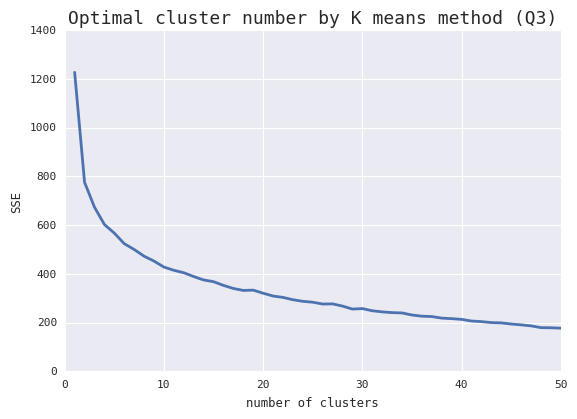

[8 4 4 3 8 7 5 0 4 4 6 8 4 7 6 3 6 0 3 7 8 8 8 5 5 3 3 0 0 5 0 1 3 6 3 0 5
 4 1 3 5 6 7 3 2 5 3 5 9 9 7 6 4 8 6 4 6 4 9 8 1 9 4 3 1 4 9 9 4 3 3 1 6 4
 2 9 4 9 8 5 2 2 9 5 7 9 9 2 9 2 5 6 3 9 6 4 5 7 2 2 8 2 9 1 7 1 4 1 1 4 4
 8 4 1 7 9 0 5 4 5 5 3 1 8 8 5 1 7 0 9 6 8 2 3 8 1 5 6 9 7 4 7 6 9 3 5 3 8
 3 6 2 9 5 5 4 6 4 4 6 7 5 3 2 3 6 8 4 7 1 4 0 2 5 6 6 4 3 9 5 4 8 8 2 7 6
 1 8 4 3 1 1 9 5 8 2 7 8 2 0 6 3 6 5 5 5 7 0 3 1 9 1 0 8 7 2 0 2 9 9 3 1 0
 7 0 3 5 4 9 1 9 8 3 5 4 4 7 7 7 7 0 1 3 1 1 4 1 8 6 6 6 9 0 3 0 9 8 6 3 5
 0 3 5 1 1 6 3 4 2 1 0 0 8 9 3 8 0 1 3 1 7 1 5 4 8 7 4 7 1 4 0 7 5 6 6 1 1
 8]

[[  5.81521739e-01   3.04347826e-01   1.73913043e-01   8.26086957e-01
    0.00000000e+00   8.32667268e-17   3.72026217e-01   2.61167391e-01
   -8.32667268e-17   1.66533454e-16   1.00000000e+00   3.46944695e-18
    6.32260174e-01   2.60869565e-01   1.38849870e-01   2.17391304e-01
    1.59420348e-01   3.46944695e-17   1.00000000e+00  -1.11022302e-16
    2.60869565e-01]
 [  5.74754941e-01   8.23

In [16]:
Kmean_score = np.zeros((50,1))
for i in range(50):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df)
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

# plt.figure(figsize=(10,5))
plt.plot(np.arange(1,51), Kmean_score, lw=2)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Optimal cluster number by K means method (Q3)',fontsize=13)
plt.show()

start_time = time.time()
k = cluster.KMeans(n_clusters=10, random_state=0).fit(df)
print(k.labels_)
print()
print(k.cluster_centers_)
print()
print(k.inertia_)
load_time_k_3 = time.time() - start_time

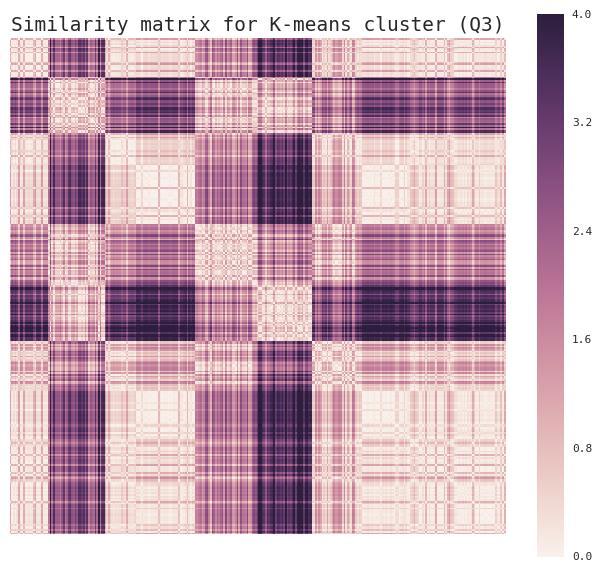

In [17]:
pca = PCA(n_components=1)
df_3_pca = np.ravel(pca.fit_transform(df))
DDD = [df_3_pca.T,k.labels_]
df_3_db = pd.DataFrame(DDD)
df_3_db = np.array(df_3_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
df_3_similar = pairwise_distances(df_3_db, metric='euclidean')
df_3_similar.shape

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_3_similar, vmax=4, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for K-means cluster (Q3)',fontsize=14)
plt.show()

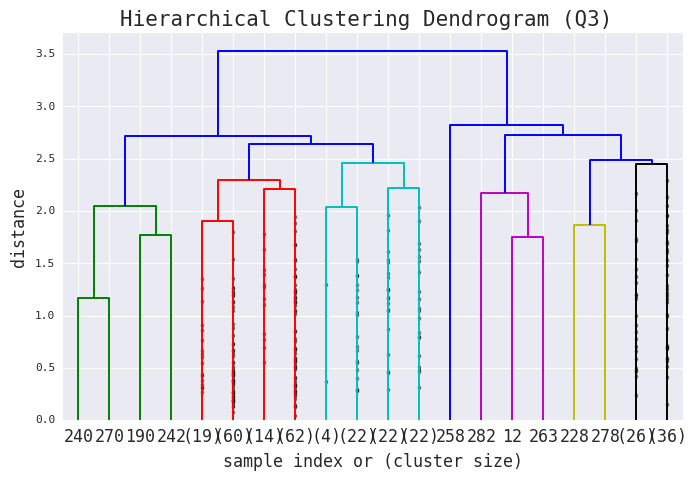

In [18]:
start_time = time.time()
fig = plt.figure(figsize=(8,5))
Y = distance.pdist(df)
Z = hierarchy.linkage(Y, method = "average", metric = "euclidean")
T = hierarchy.fcluster(Z, 10, criterion = "distance",depth=5)
plt.title('Hierarchical Clustering Dendrogram (Q3) ',fontsize=15)
plt.xlabel('sample index or (cluster size)',fontsize=12)
plt.ylabel('distance',fontsize=12)
hierarchy.dendrogram(Z,4,truncate_mode='level',orientation='top',show_contracted=True)
plt.show()
load_time_h_3 = time.time() - start_time

[-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  4  0 -1 -1 -1 -1 -1
  2  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1
  5 -1  5 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  5 -1 -1 -1  2  5 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  5 -1 -1 -1  3 -1  4
 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1  0  0  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  5 -1  2 -1 -1 -1 -1  2 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  2 -1
 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1  3 -1 -1 -1  0 -1 -1 -1 -1 -1 -1]


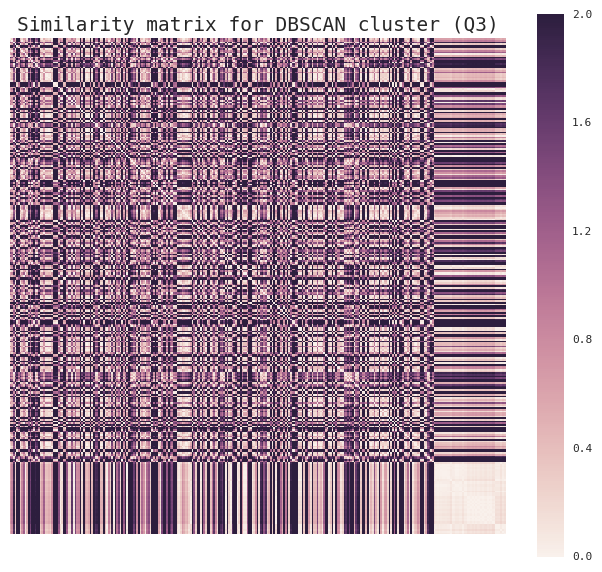

In [46]:
start_time = time.time()
DBSCAN = cluster.DBSCAN(metric='euclidean', algorithm='auto', leaf_size=4, p=None).fit(df)
print(DBSCAN.labels_) 


pca = PCA(n_components=1)
df_3_pca = np.ravel(pca.fit_transform(df))
DDD = [df_3_pca.T,DBSCAN.labels_]
df_3_db = pd.DataFrame(DDD)
df_3_db = np.array(df_3_db.T.sort_values(by=[1], ascending=[True]).drop([1],1))
# print(df_2_db)
df_3_similar = pairwise_distances(df_3_db, metric='euclidean')
# print(df_2_similar)
load_time_d_3 = time.time() - start_time

# Similarity matrix
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(8, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_3_similar, vmax=2, square=True)
ax.set_yticks([])
ax.set_xticks([])
plt.title('Similarity matrix for DBSCAN cluster (Q3)',fontsize=14)
plt.show()


In [57]:
DBSCAN_p = cluster.DBSCAN(metric='euclidean', algorithm='auto', leaf_size=4, p=None).fit_predict(df)
print(DBSCAN_p) 

[-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  4  0 -1 -1 -1 -1 -1
  2  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1
  5 -1  5 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  5 -1 -1 -1  2  5 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  5 -1 -1 -1  3 -1  4
 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1  0  0  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  5 -1  2 -1 -1 -1 -1  2 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  2 -1
 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1  3 -1 -1 -1  0 -1 -1 -1 -1 -1 -1]


In [67]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_samples
print(mutual_info_score(DBSCAN.labels_,DBSCAN_p))
print(normalized_mutual_info_score(DBSCAN.labels_,DBSCAN_p))
print(v_measure_score(DBSCAN.labels_,DBSCAN_p))
silhouette_samples(df,DBSCAN.labels_).sort_values(by=DBSCAN.labels_, ascending=[True])

0.657189170738
1.0
1.0


AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [48]:
print(DBSCAN.get_params())
cluster_percentage = [0]*10
for i in range(10):
    print(collections.Counter(DBSCAN.labels_)[i-2]*100/297)

{'leaf_size': 4, 'random_state': None, 'metric': 'euclidean', 'p': None, 'eps': 0.5, 'min_samples': 5, 'algorithm': 'auto'}
0.0
85.85858585858585
3.367003367003367
2.6936026936026938
2.356902356902357
2.0202020202020203
1.6835016835016836
2.0202020202020203
0.0
0.0


In [49]:
print("It took %.8s seconds to form K means cluster for Q3" % (load_time_k_3))
print("It took %.8s seconds to form Hierarchical cluster for Q3" % (load_time_h_3))
print("It took %.8s seconds to form DBSCAN cluster for Q3" % (load_time_d_3))

It took 0.066802 seconds to form K means cluster for Q3
It took 0.455607 seconds to form Hierarchical cluster for Q3
It took 0.034003 seconds to form DBSCAN cluster for Q3
